In [13]:
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from get_clean_data_FTbreakdown import get_data, clean_data

In [23]:
with open('form5500_data/config.json') as f:
    conf = json.load(f)
    host = conf['host']
    database = conf['database']
    user = conf['user']
    passw = conf['passw']
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)
conn = psycopg2.connect(conn_str)

In [24]:
query = '''SELECT sb.SB_EIN, sb.SB_PN, sb.SB_EFF_INT_RATE_PRCNT, sb.SB_PLAN_TYPE_CODE,
       sb.SB_TOT_PARTCP_CNT, sb.SB_ACT_PARTCP_CNT, SB_TERM_PARTCP_CNT, SB_RTD_PARTCP_CNT,
       sb.SB_TOT_FNDNG_TGT_AMT, SB_LIAB_ACT_TOT_FNDNG_TGT_AMT, SB_TERM_FNDNG_TGT_AMT, SB_RTD_FNDNG_TGT_AMT,
       f.PLAN_NAME, f.SPONSOR_DFE_NAME
       FROM sb_full sb 
       LEFT JOIN f5500_full f 
       ON sb.SB_EIN = f.SPONS_DFE_EIN AND sb.SB_PN = f.SPONS_DFE_PN 
       WHERE sb.SB_PLAN_YEAR_BEGIN_DATE BETWEEN '2017-01-01' AND '2017-12-31'
       AND sb.SB_PLAN_TYPE_CODE = '1';'''

In [25]:
df = pd.read_sql(query, con=conn)
conn.close()

In [26]:
df

,sb_ein,sb_pn,sb_eff_int_rate_prcnt,sb_plan_type_code,sb_tot_partcp_cnt,sb_act_partcp_cnt,sb_term_partcp_cnt,sb_rtd_partcp_cnt,sb_tot_fndng_tgt_amt,sb_liab_act_tot_fndng_tgt_amt,sb_term_fndng_tgt_amt,sb_rtd_fndng_tgt_amt,plan_name,sponsor_dfe_name
0,900064107,1,5.72,1,2,2,None,None,2.339570e+05,233957.0,NaN,NaN,None,None
1,621783082,2,5.63,1,16,16,0,0,0.000000e+00,0.0,0.0,0.0,None,None
2,43656488,2,5.87,1,29,29,0,0,3.467760e+05,346776.0,0.0,0.0,None,None
3,351996340,2,5.08,1,12,12,0,0,0.000000e+00,0.0,0.0,0.0,None,None
4,223846487,2,5.80,1,14,12,2,0,2.916310e+05,288933.0,2698.0,0.0,None,None
5,930243630,1,6.01,1,47,31,12,4,6.220150e+06,2842605.0,601739.0,2775806.0,None,None
6,271702852,1,5.72,1,3,3,0,0,9.884800e+04,98848.0,0.0,0.0,None,None
7,951778500,25,5.80,1,15730,1876,5713,8141,1.008933e+09,284961685.0,159361006.0,564610633.0,RAYTHEON COMPANY PENSION PLAN FOR HOURLY EMPLO...,RAYTHEON COMPANY
8,951778500,25,5.80,1,15730,1876,5713,8141,1.008933e+09,284961685.0,159361006.0,564610633.0,RAYTHEON COMPANY PENSION PLAN FOR HOURLY EMPLO...,RAYTHEON COMPANY
9,951778500,25,5.80,1,15730,1876,5713,8141,1.008933e+09,284961685.0,159361006.0,564610633.0,RAYTHEON COMPANY PENSION PLAN FOR HOURLY EMPLO...,RAYTHEON COMPANY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24273 entries, 0 to 24272
Data columns (total 14 columns):
sb_ein                           24273 non-null int64
sb_pn                            24273 non-null int64
sb_eff_int_rate_prcnt            24238 non-null float64
sb_plan_type_code                24273 non-null object
sb_tot_partcp_cnt                24244 non-null object
sb_act_partcp_cnt                24216 non-null object
sb_term_partcp_cnt               23972 non-null object
sb_rtd_partcp_cnt                23858 non-null object
sb_tot_fndng_tgt_amt             24250 non-null float64
sb_liab_act_tot_fndng_tgt_amt    24204 non-null float64
sb_term_fndng_tgt_amt            23949 non-null float64
sb_rtd_fndng_tgt_amt             23840 non-null float64
plan_name                        9234 non-null object
sponsor_dfe_name                 9234 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 2.6+ MB


<h3>Convert object counts to numeric</h3>

In [27]:
clean_list = ['sb_tot_partcp_cnt', 'sb_act_partcp_cnt','sb_term_partcp_cnt', 'sb_rtd_partcp_cnt']

for c in clean_list:
    df[c] = pd.to_numeric(df[c])

df['sb_eff_int_rate_prcnt'] = np.where(df['sb_eff_int_rate_prcnt']>100, df['sb_eff_int_rate_prcnt']/100, df['sb_eff_int_rate_prcnt'])

<h3>Remove outliers and plans with $0 FT</h3>

In [28]:
df=df[(df['sb_tot_fndng_tgt_amt']>0) & (df['sb_rtd_partcp_cnt']< 100000) &\
       (df['sb_act_partcp_cnt']< 300000) & (df['sb_term_partcp_cnt'] < 100000)]

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sb_ein,22199.0,4.434496e+08,2.747170e+08,10020240.00,2.223632e+08,3.646381e+08,6.504495e+08,9.903542e+08
sb_pn,22199.0,2.904365e+00,1.296305e+01,1.00,1.000000e+00,2.000000e+00,2.000000e+00,3.980000e+02
sb_eff_int_rate_prcnt,22190.0,5.672358e+00,5.250319e-01,0.08,5.630000e+00,5.760000e+00,5.930000e+00,1.140000e+01
sb_tot_partcp_cnt,22199.0,5.160011e+02,5.941074e+03,0.00,4.000000e+00,8.000000e+00,2.600000e+01,1.793500e+05
sb_act_partcp_cnt,22199.0,1.508085e+02,1.729165e+03,0.00,3.000000e+00,6.000000e+00,1.700000e+01,8.941000e+04
sb_term_partcp_cnt,22199.0,1.504570e+02,2.004383e+03,0.00,0.000000e+00,1.000000e+00,5.000000e+00,9.312700e+04
sb_rtd_partcp_cnt,22199.0,2.147357e+02,2.715693e+03,0.00,0.000000e+00,0.000000e+00,0.000000e+00,8.966500e+04
sb_tot_fndng_tgt_amt,22199.0,4.567059e+07,6.876211e+08,1.00,4.037920e+05,9.809850e+05,2.475862e+06,2.995327e+10
sb_liab_act_tot_fndng_tgt_amt,22199.0,1.615931e+07,2.631224e+08,0.00,3.365850e+05,8.424900e+05,1.950283e+06,1.111749e+10
sb_term_fndng_tgt_amt,22187.0,6.326832e+06,8.930596e+07,0.00,0.000000e+00,5.740000e+02,6.267000e+04,3.705227e+09


<h1>Funding Target Distribution</h1>

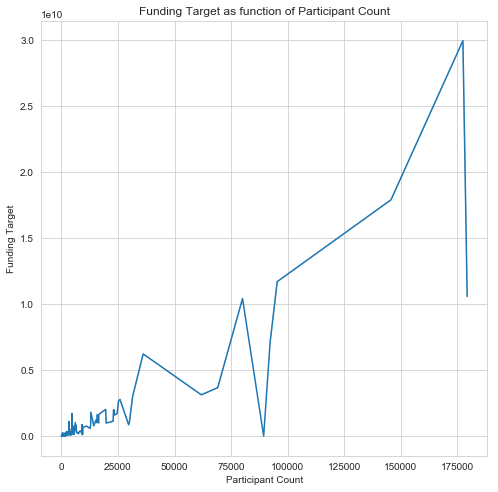

In [30]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax = sns.lineplot(x=df['sb_tot_partcp_cnt'], y=df['sb_tot_fndng_tgt_amt'])
plt.title('Funding Target as function of Participant Count')
plt.xlabel('Participant Count')
plt.ylabel('Funding Target')
plt.show()

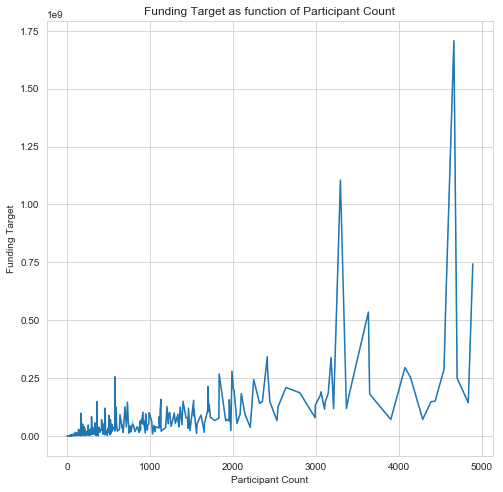

In [31]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax = sns.lineplot(x=df[df['sb_tot_partcp_cnt']<5000]['sb_tot_partcp_cnt'], y=df[df['sb_tot_partcp_cnt']<5000]['sb_tot_fndng_tgt_amt'])
plt.title('Funding Target as function of Participant Count')
plt.xlabel('Participant Count')
plt.ylabel('Funding Target')
plt.show()

<h1>Funding Target vs Participant Count - Total and by Status</h1>

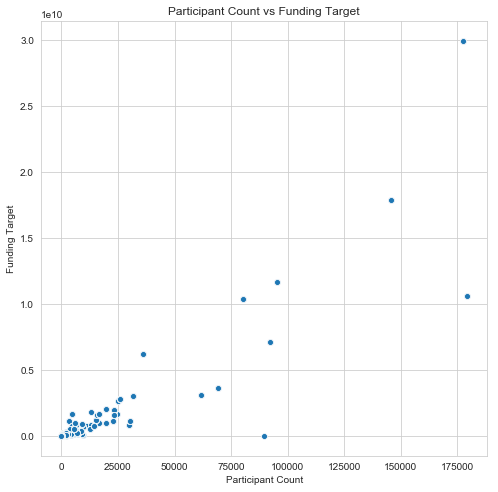

In [32]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.scatterplot(x=df['sb_tot_partcp_cnt'], y=df['sb_tot_fndng_tgt_amt'])
plt.title('Participant Count vs Funding Target')
plt.xlabel('Participant Count')
plt.ylabel('Funding Target')
plt.show()

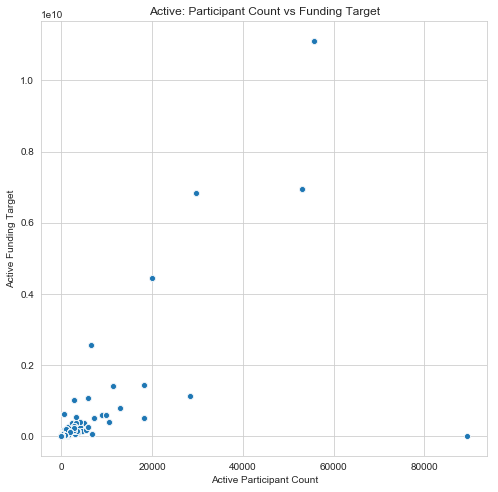

In [33]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.scatterplot(x=df['sb_act_partcp_cnt'], y=df['sb_liab_act_tot_fndng_tgt_amt'])
plt.title('Active: Participant Count vs Funding Target')
plt.xlabel('Active Participant Count')
plt.ylabel('Active Funding Target')
plt.show()

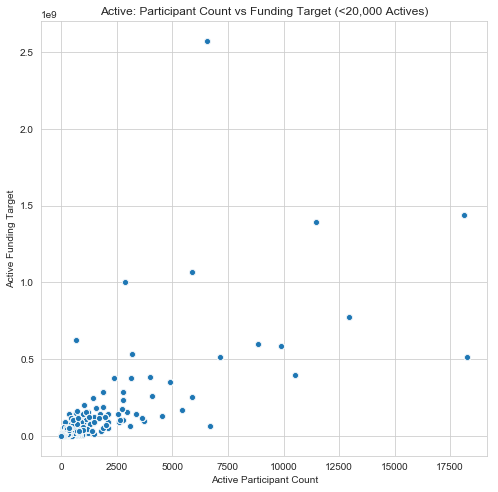

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
x=df[df['sb_act_partcp_cnt']<20000]['sb_act_partcp_cnt']
y=df[df['sb_act_partcp_cnt']<20000]['sb_liab_act_tot_fndng_tgt_amt']
ax = sns.scatterplot(x=x, y=y)
plt.title('Active: Participant Count vs Funding Target (<20,000 Actives)')
plt.xlabel('Active Participant Count')
plt.ylabel('Active Funding Target')
plt.show()

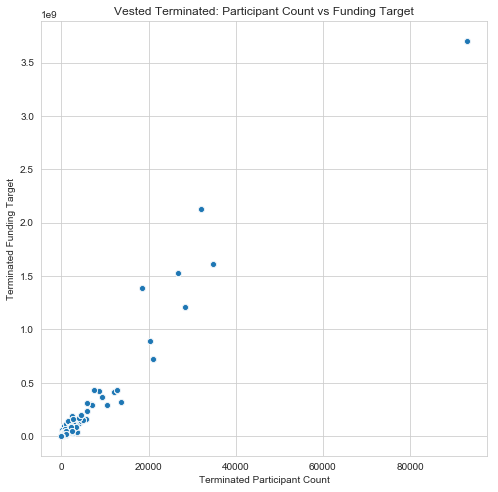

In [35]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.scatterplot(x=df['sb_term_partcp_cnt'], y=df['sb_term_fndng_tgt_amt'])
plt.title('Vested Terminated: Participant Count vs Funding Target')
plt.xlabel('Terminated Participant Count')
plt.ylabel('Terminated Funding Target')
plt.show()

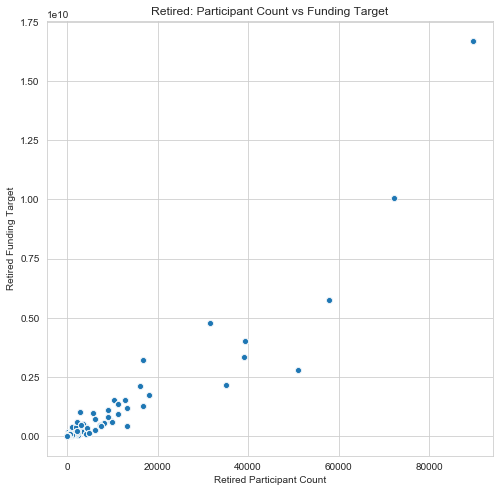

In [36]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.scatterplot(x=df['sb_rtd_partcp_cnt'], y=df['sb_rtd_fndng_tgt_amt'])
plt.title('Retired: Participant Count vs Funding Target')
plt.xlabel('Retired Participant Count')
plt.ylabel('Retired Funding Target')
plt.show()

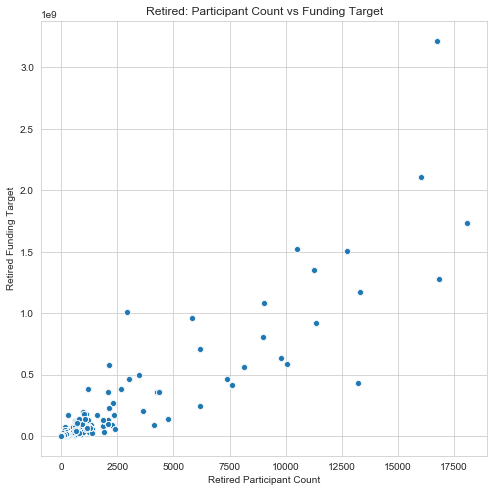

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.scatterplot(x=df[df['sb_rtd_partcp_cnt']<20000]['sb_rtd_partcp_cnt'], y=df[df['sb_rtd_partcp_cnt']<20000]['sb_rtd_fndng_tgt_amt'],)
plt.title('Retired: Participant Count vs Funding Target')
plt.xlabel('Retired Participant Count')
plt.ylabel('Retired Funding Target')
plt.show()